<a href="https://colab.research.google.com/github/zkinard/CS-4410-Intro-to-Machine-Learning/blob/main/KinardWeek8_Ex16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 16.1 (MNIST Data)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [8]:
from tensorflow.keras.datasets import mnist

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
y_test.shape

(10000,)

In [14]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

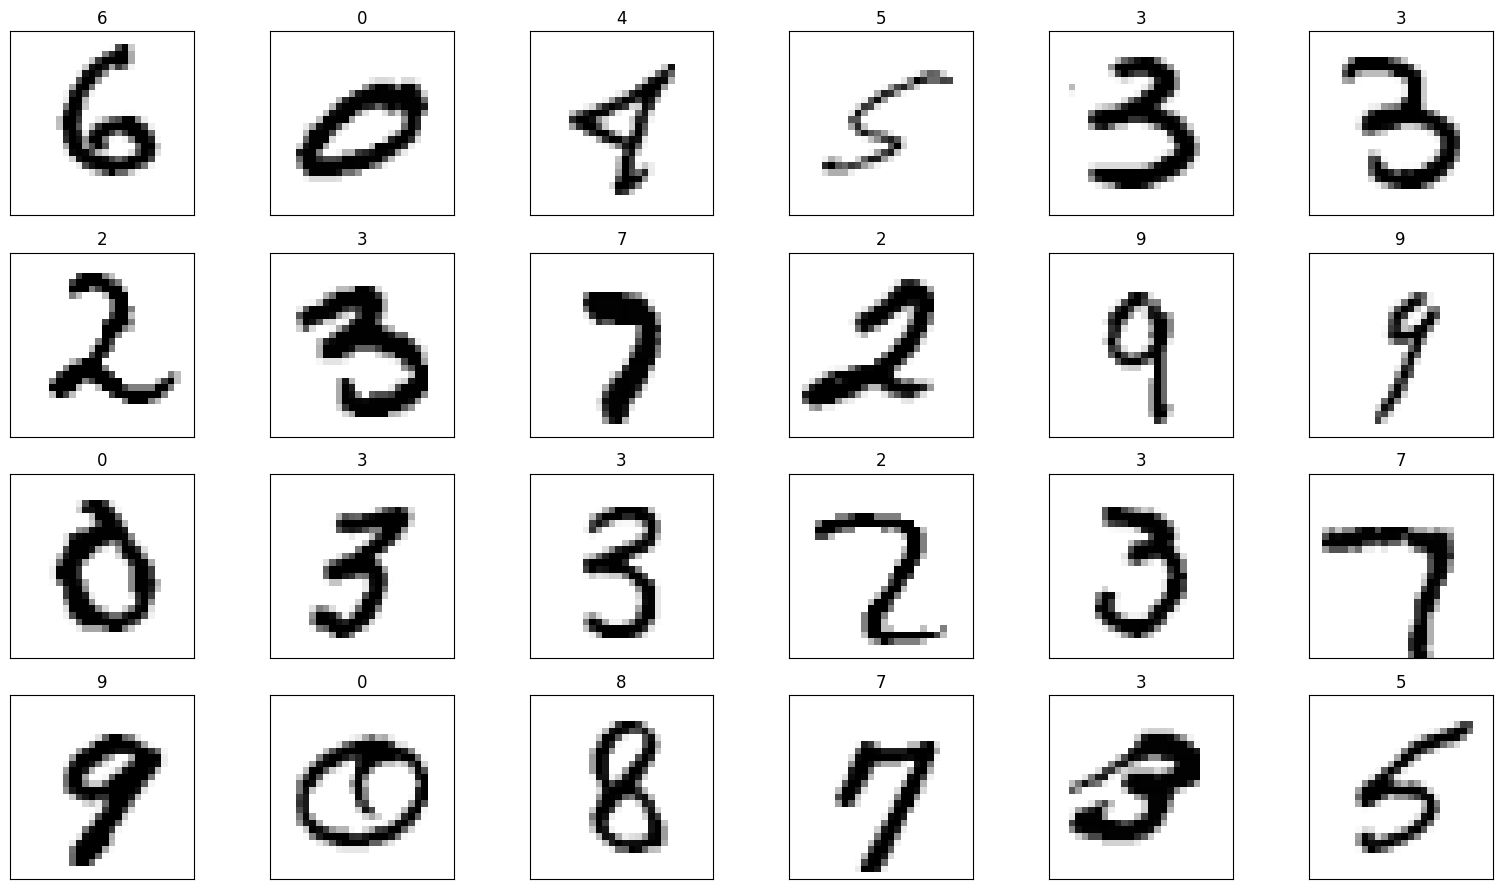

In [22]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [23]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [28]:
X_test.shape

(10000, 28, 28, 1)

In [29]:
X_train = X_train.astype('float32') / 255

In [30]:
X_test = X_test.astype('float32') / 255

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_train = to_categorical(y_train)

In [33]:
y_train.shape

(60000, 10)

In [34]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [35]:
y_test = to_categorical(y_test)

In [37]:
y_test.shape

(10000, 10)

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
cnn = Sequential()

In [40]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [41]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

In [42]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [43]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [44]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [45]:
cnn.add(Flatten())

In [46]:
cnn.add(Dense(units=128, activation='relu'))

In [47]:
cnn.add(Dense(units=10, activation='softmax'))

In [48]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

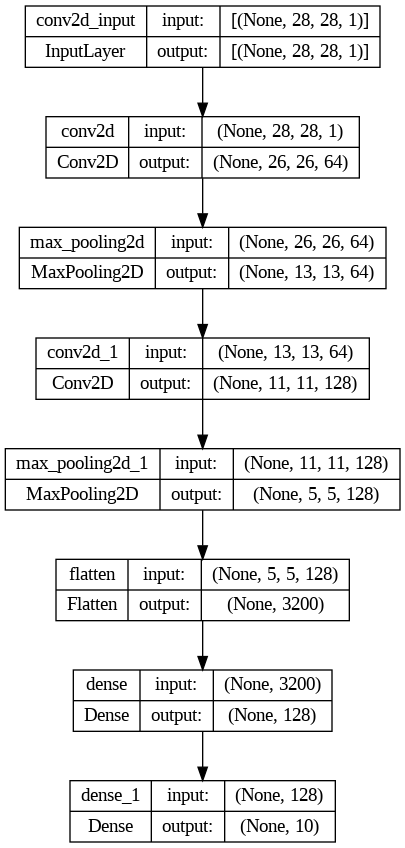

In [49]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [50]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [51]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 154s 181ms/step - loss: 0.1442 - accuracy: 0.9563 - val_loss: 0.0481 - val_accuracy: 0.9862
Epoch 2/5
844/844 [==============================] - 150s 177ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.0410 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 149s 177ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 149s 177ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 5/5
844/844 [==============================] - 147s 174ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0344 - val_accuracy: 0.9898


In [52]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.0322 - accuracy: 0.9901


In [53]:
loss

0.03223637118935585

In [54]:
accuracy

0.9901000261306763

In [55]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 7s 20ms/step


In [56]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [57]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000160%
1: 0.0000000018%
2: 0.0000094359%
3: 0.0000496875%
4: 0.0000000000%
5: 0.0000000011%
6: 0.0000000000%
7: 99.9997913837%
8: 0.0000000036%
9: 0.0001405179%


In [58]:
images = X_test.reshape((10000, 28, 28))

In [59]:
incorrect_predictions = []

In [60]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [61]:
len(incorrect_predictions)  # number of incorrect predictions

99

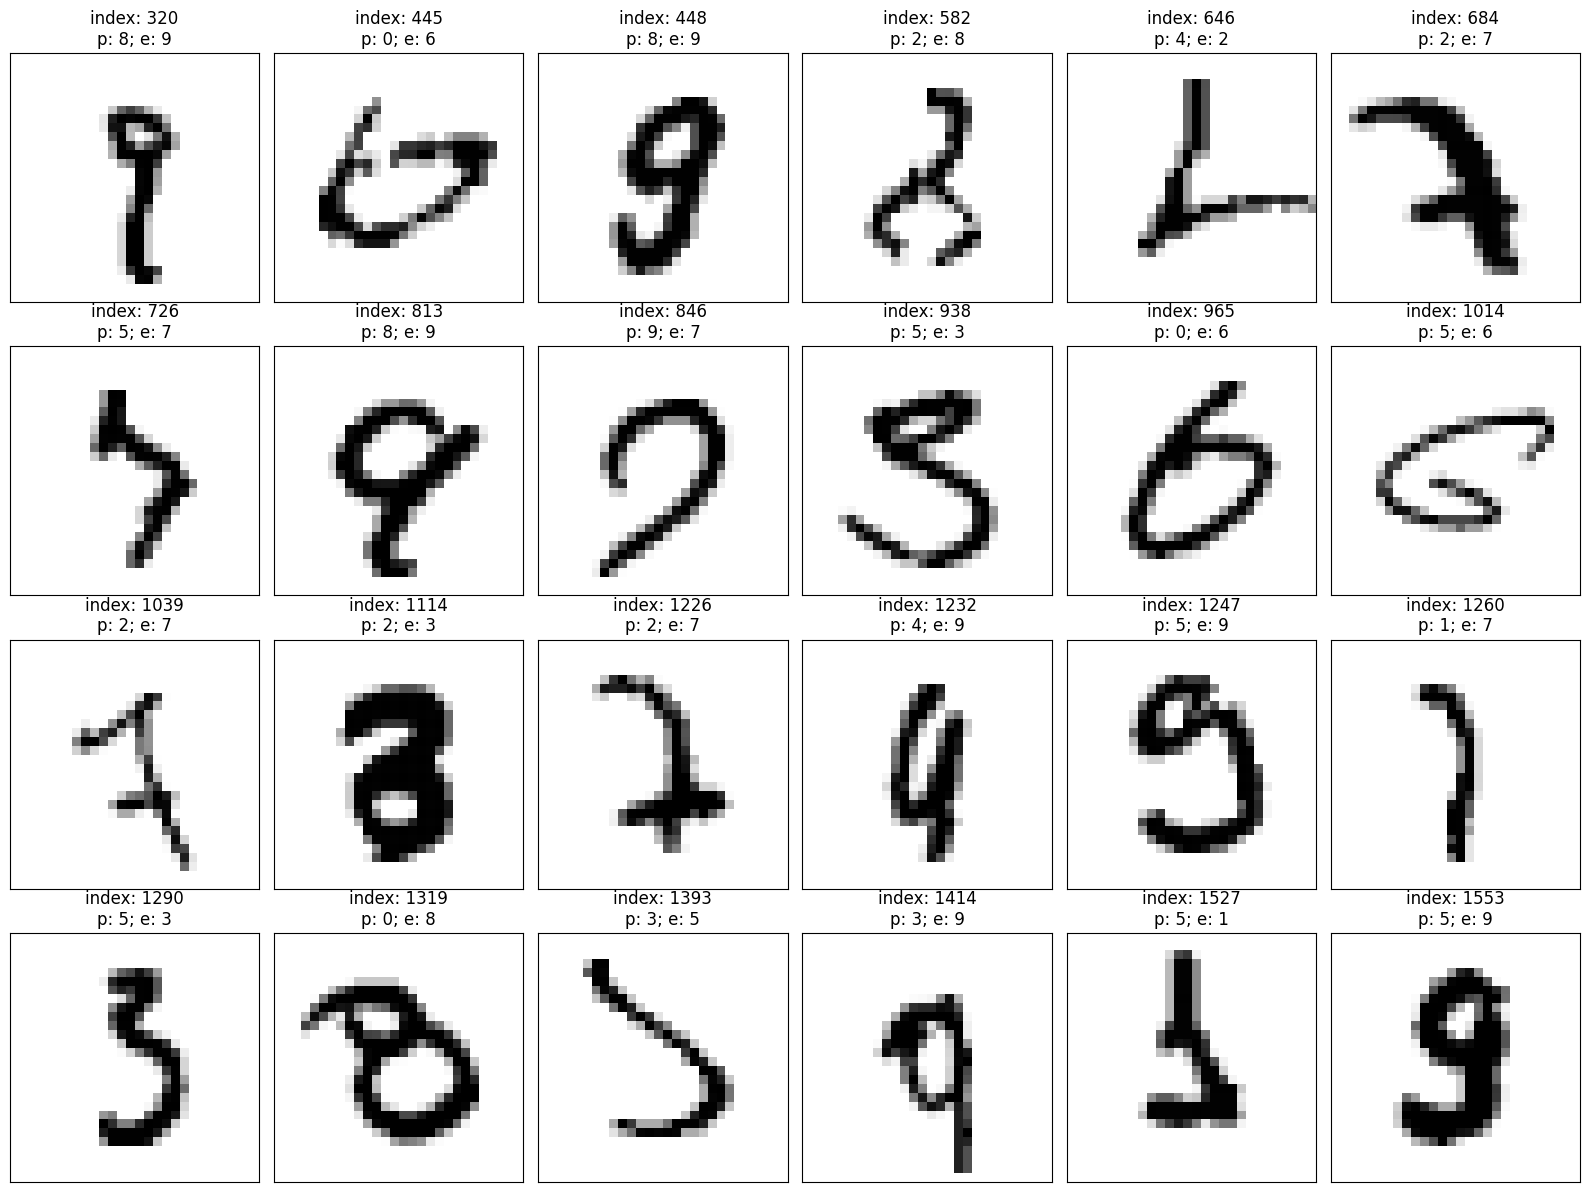

In [62]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [63]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [65]:
display_probabilities(predictions[445])

0: 66.5300667286%
1: 0.0000002217%
2: 0.0001279391%
3: 0.0000770383%
4: 0.0007127427%
5: 0.0574246573%
6: 33.4047049284%
7: 0.0000001005%
8: 0.0067285415%
9: 0.0001609716%


In [68]:
display_probabilities(predictions[1226])

0: 0.0000119365%
1: 0.3753311699%
2: 97.3881423473%
3: 0.0005172114%
4: 0.0001535130%
5: 0.0000000353%
6: 0.0000000194%
7: 2.2358326241%
8: 0.0000123930%
9: 0.0000015711%


In [69]:
display_probabilities(predictions[1414])

0: 16.6377380490%
1: 0.0718145166%
2: 0.4693423864%
3: 35.0752204657%
4: 21.9691649079%
5: 14.0816971660%
6: 0.0038644459%
7: 1.4789232984%
8: 3.4200202674%
9: 6.7922256887%


Ex 16.1 (Fashion-MNIST Data)

In [70]:
from tensorflow.keras.datasets import fashion_mnist

In [72]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [73]:
X_train.shape

(60000, 28, 28)

In [74]:
y_train.shape

(60000,)

In [75]:
X_test.shape

(10000, 28, 28)

In [76]:
y_test.shape

(10000,)

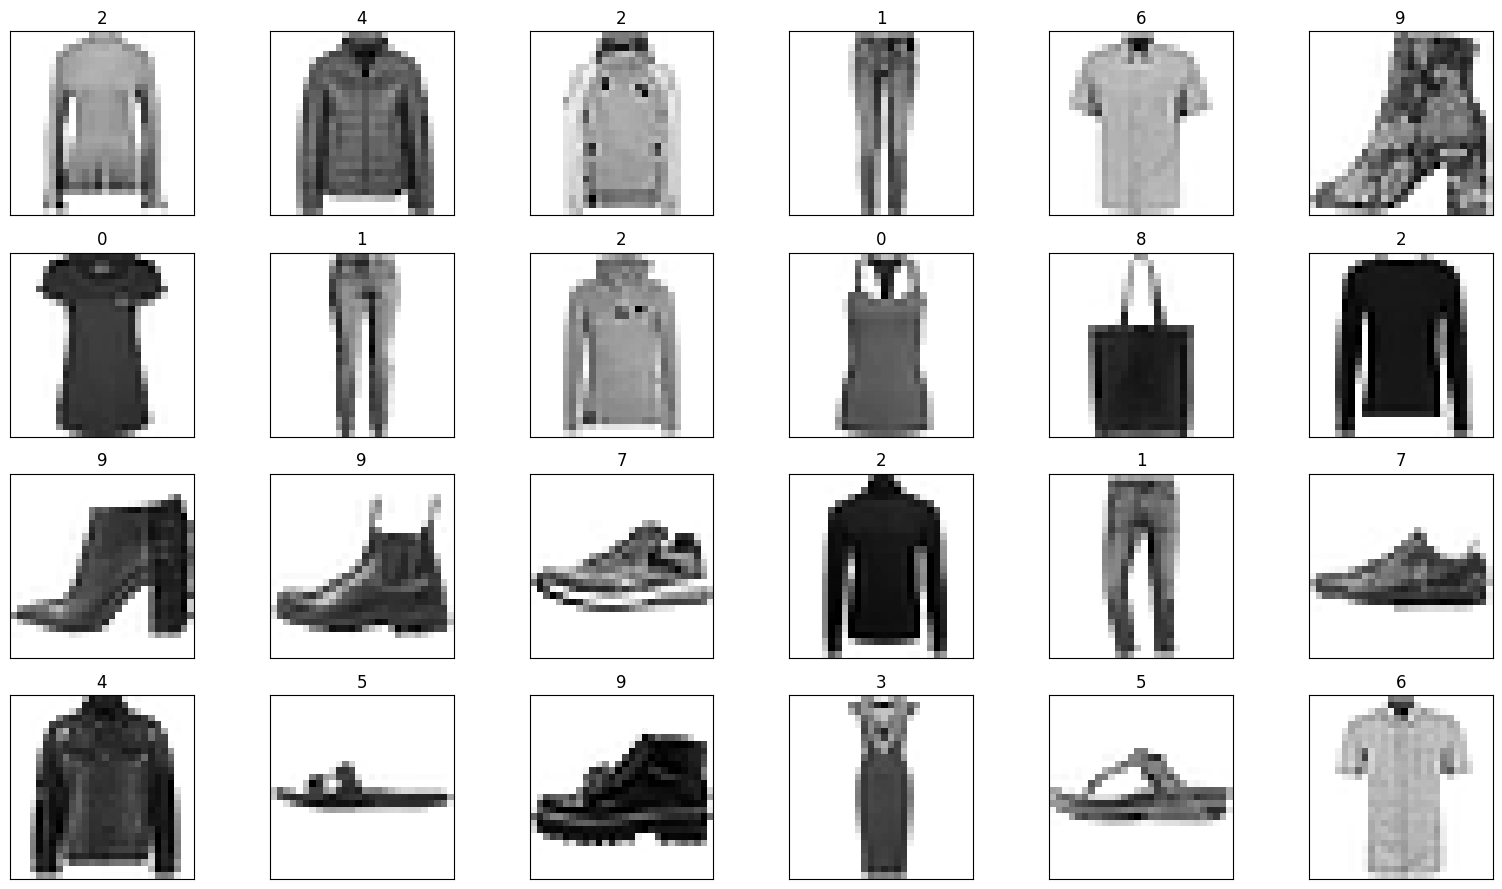

In [78]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [80]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [81]:
X_train.shape

(60000, 28, 28, 1)

In [82]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [83]:
X_test.shape

(10000, 28, 28, 1)

In [84]:
X_train = X_train.astype('float32') / 255

In [85]:
X_test = X_test.astype('float32') / 255

In [86]:
y_train = to_categorical(y_train)

In [87]:
y_train.shape

(60000, 10)

In [89]:
y_test = to_categorical(y_test)

In [90]:
y_test.shape

(10000, 10)

In [91]:
cnn = Sequential()

In [92]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

In [93]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [94]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [95]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [96]:
cnn.add(Flatten())

In [97]:
cnn.add(Dense(units=128, activation='relu'))

In [98]:
cnn.add(Dense(units=10, activation='softmax'))

In [99]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

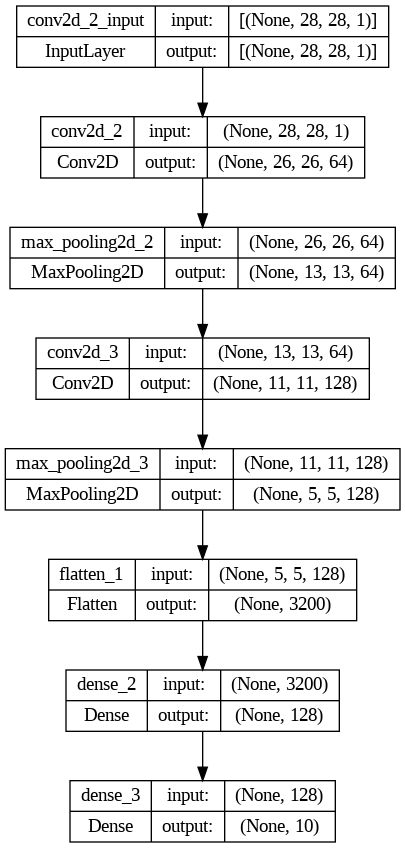

In [100]:
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [101]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [102]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 145s 170ms/step - loss: 0.4595 - accuracy: 0.8336 - val_loss: 0.3307 - val_accuracy: 0.8833
Epoch 2/5
844/844 [==============================] - 147s 174ms/step - loss: 0.3061 - accuracy: 0.8892 - val_loss: 0.2857 - val_accuracy: 0.8957
Epoch 3/5
844/844 [==============================] - 150s 177ms/step - loss: 0.2618 - accuracy: 0.9040 - val_loss: 0.2884 - val_accuracy: 0.8943
Epoch 4/5
844/844 [==============================] - 144s 171ms/step - loss: 0.2296 - accuracy: 0.9162 - val_loss: 0.2516 - val_accuracy: 0.9082
Epoch 5/5
844/844 [==============================] - 144s 170ms/step - loss: 0.2026 - accuracy: 0.9233 - val_loss: 0.2569 - val_accuracy: 0.9102


In [103]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.2697 - accuracy: 0.9023


In [104]:
loss

0.26967284083366394

In [105]:
accuracy

0.9023000001907349

In [106]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 9s 28ms/step


In [107]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [108]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000713318%
1: 0.0000007475%
2: 0.0000120918%
3: 0.0000173452%
4: 0.0000086658%
5: 0.0194187262%
6: 0.0000161510%
7: 0.3351117019%
8: 0.0001991499%
9: 99.6451437473%


In [109]:
images = X_test.reshape((10000, 28, 28))

In [110]:
incorrect_predictions = []

In [111]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [112]:
len(incorrect_predictions)  # number of incorrect predictions

977

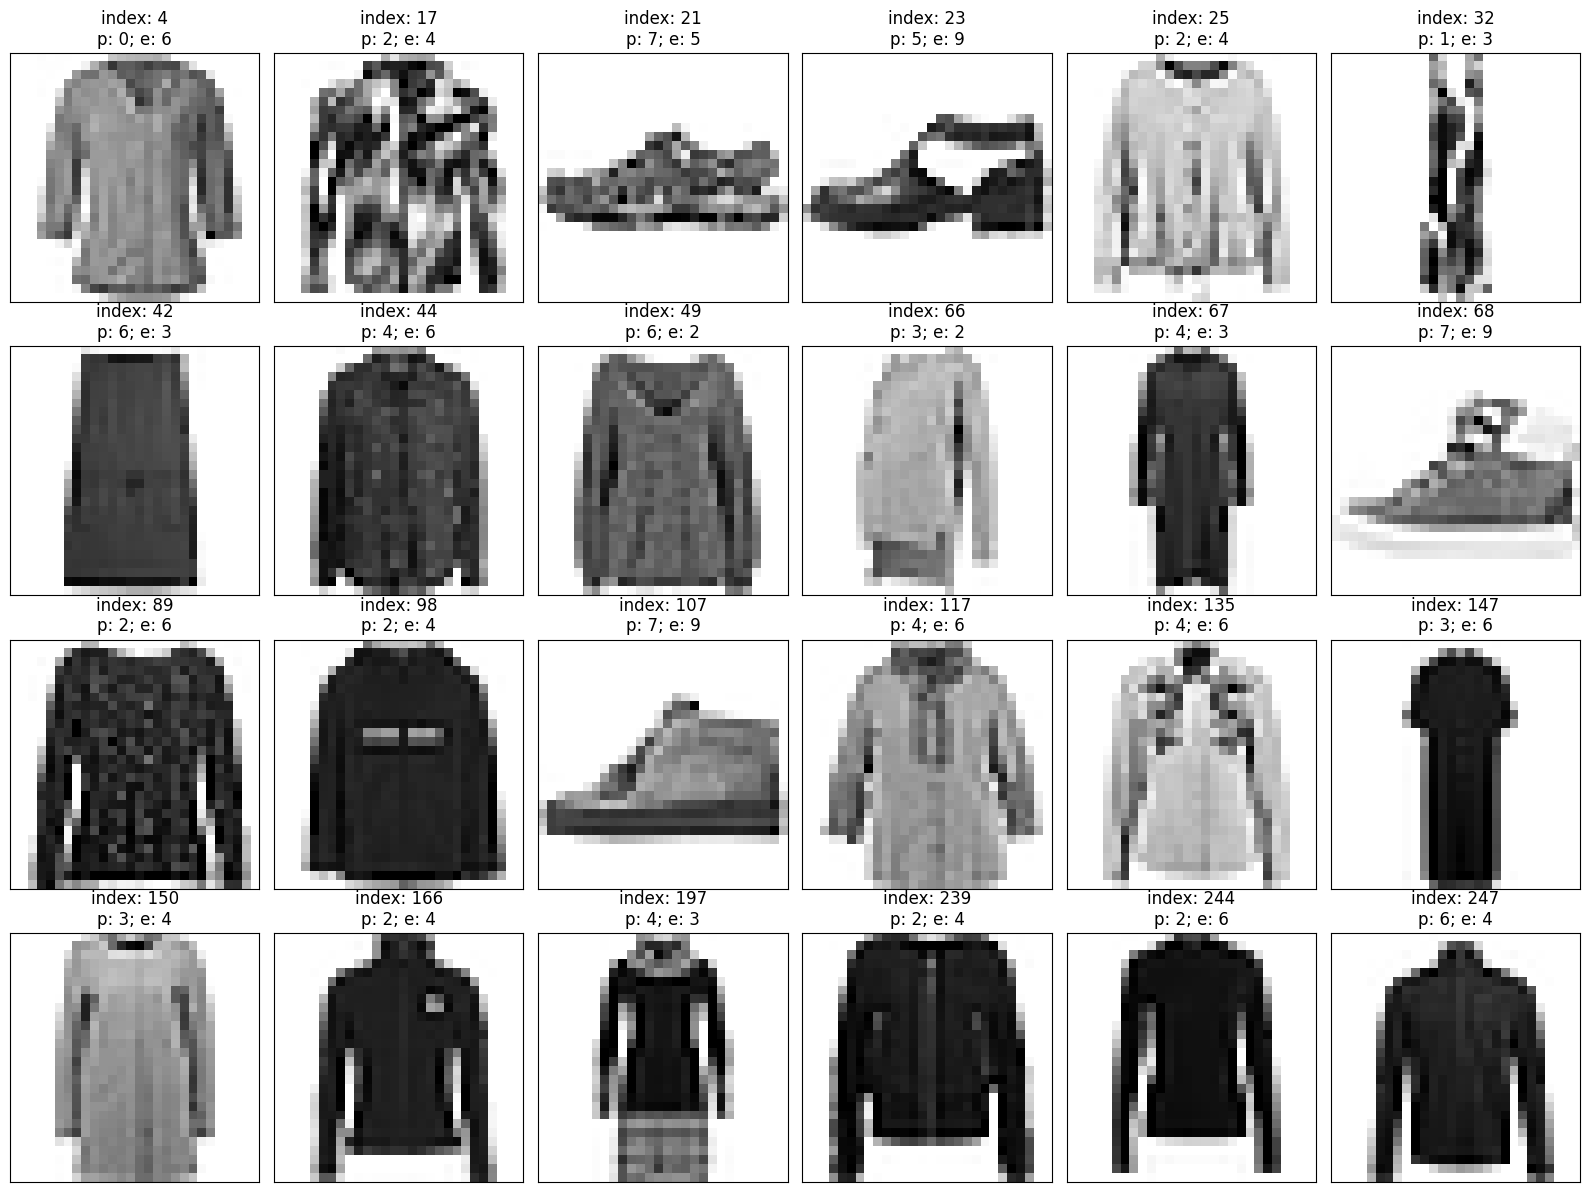

In [113]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [114]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [117]:
display_probabilities(predictions[67])

0: 0.0424304075%
1: 0.0038273851%
2: 0.5116578657%
3: 17.5654277205%
4: 80.7574391365%
5: 0.0002150106%
6: 1.0108427145%
7: 0.0052741150%
8: 0.1017601695%
9: 0.0011252888%


In [116]:
display_probabilities(predictions[107])

0: 0.0040711981%
1: 0.0000098184%
2: 0.0005667031%
3: 0.0015391166%
4: 0.0006069825%
5: 0.1008830732%
6: 0.0012175321%
7: 81.2747418880%
8: 0.4193311557%
9: 18.1970328093%


In [115]:
display_probabilities(predictions[244])

0: 0.1915212837%
1: 0.0000150618%
2: 98.4059393406%
3: 0.0091243426%
4: 0.4956657533%
5: 0.0000062138%
6: 0.8976331912%
7: 0.0000001109%
8: 0.0000971266%
9: 0.0000022333%


How well does the model perform on Fashion-MNIST compared to MNIST?
    The model had a lower accuracy on Fashion-MNIST (90%) than MNIST (99%).

How do the training times compare?
  The training time for Fashion-MNIST was faster than MNIST. Fashion-MNIST had a range of 144-150 seconds per epoch and a total execution time of the cell of 743 seconds. MNIST had a range of 147-154 seconds per epoch and a total execution time of 803 seconds total.